<a href="https://colab.research.google.com/github/Mani512996/Interview-project/blob/main/mobile_number_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('user_behavior_dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [23]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


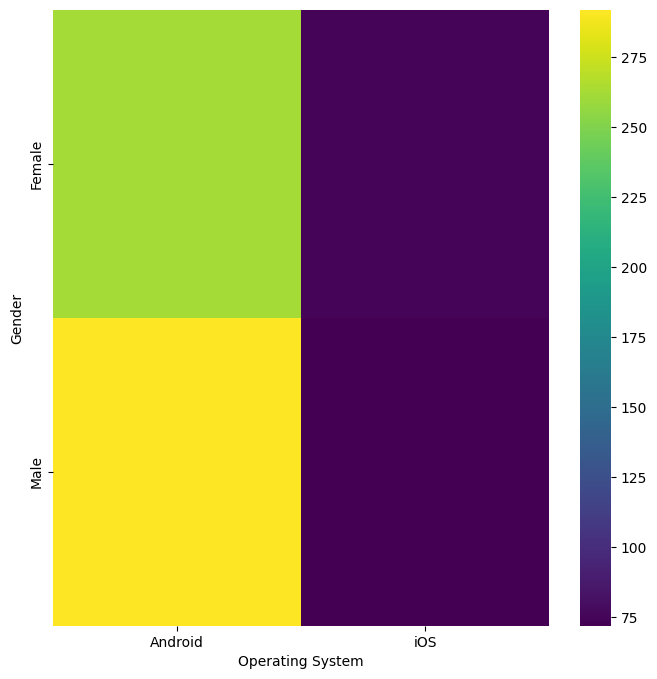

In [35]:
# Operating System vs Gender

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('Operating System')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Operating System')
_ = plt.ylabel('Gender')

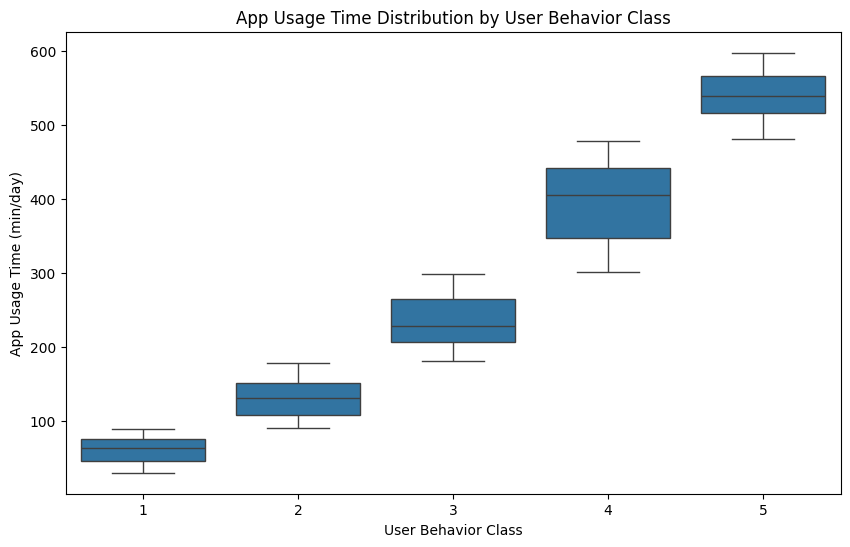

In [34]:


plt.figure(figsize=(10, 6))
sns.boxplot(x='User Behavior Class', y='App Usage Time (min/day)', data=df)
plt.xlabel('User Behavior Class')
plt.ylabel('App Usage Time (min/day)')
_ = plt.title('App Usage Time Distribution by User Behavior Class')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [27]:

X = df[['Data Usage (MB/day)','Age']]
y = df['Operating System']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_y_pred))



Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

     Android       0.80      0.92      0.85       110
         iOS       0.31      0.13      0.19        30

    accuracy                           0.75       140
   macro avg       0.55      0.53      0.52       140
weighted avg       0.69      0.75      0.71       140



In [29]:
# SVM Classifier
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

     Android       0.79      1.00      0.88       110
         iOS       0.00      0.00      0.00        30

    accuracy                           0.79       140
   macro avg       0.39      0.50      0.44       140
weighted avg       0.62      0.79      0.69       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




# Save the predictions to a CSV file

In [20]:
rf_predictions_df = pd.DataFrame({'Predicted_OS': rf_y_pred})
rf_predictions_df.to_csv('randomforests.csv', index=False)

In [21]:
svm_predictions_df = pd.DataFrame({'Predicted_OS': svm_y_pred})
svm_predictions_df.to_csv('svm.csv', index=False)